In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]

TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

Array_train=np.append(TrainingData0,TrainingData1,axis=0)

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets 
model.fit(Array_train[:,0:2], Array_train[:,2])
predicted=np.zeros((5000,1))
predicted[:,0]= model.predict(TestData)

Array_test=np.append(TestData,predicted,axis=1)
Array=np.append(Array_train,Array_test,axis=0)

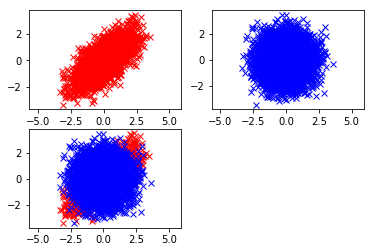

In [2]:
plt.figure(1)

plt.subplot(221) 
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.axis('equal')

plt.subplot(222) 
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.axis('equal')

plt.subplot(223) 
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.axis('equal')

plt.show()

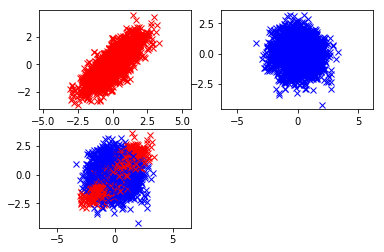

In [3]:
plt.figure(2)

plt.subplot(221) 
for i in range (0,5000):
    if (Array_test[i,2]==1):
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='r')
plt.axis('equal')

plt.subplot(222) 
for i in range (0,5000):
    if (Array_test[i,2]==0):
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='b') 
plt.axis('equal')

plt.subplot(223) 
for i in range (0,5000):
    if (Array_test[i,2]==0):
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='b') 
    else:
        plt.plot(Array_test[i,0],Array_test[i,1],'x',color='r') 
plt.axis('equal')

plt.show()

In [5]:
#Using training set to calculate the accuracy of classification

predicted_train=model.predict(Array_train[:,0:2])
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1]==predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))

accuracy = getAccuracy(Array_train, predicted_train)
print(accuracy)

0.7956


In [6]:
dfnew=pd.DataFrame({'Y0':Array[:,0],'Y1':Array[:,1],'label':Array[:,2]})
dfnew.to_csv("1challenge.csv")